In [1]:
import pandas as pd
import numpy as np
import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [27]:
# file_name = 'USvideos.csv' # change this to change country

us_df = pd.read_csv('USvideos.csv', index_col='video_id')
ca_df = pd.read_csv('CAvideos.csv', index_col='video_id')
de_df = pd.read_csv('DEvideos.csv', index_col='video_id')
fr_df = pd.read_csv('FRvideos.csv', index_col='video_id')
gb_df = pd.read_csv('GBvideos.csv', index_col='video_id')
in_df = pd.read_csv('INvideos.csv', index_col='video_id')
jp_df = pd.read_csv('JPvideos.csv', index_col='video_id')
kr_df = pd.read_csv('KRvideos.csv', index_col='video_id')
mx_df = pd.read_csv('MXvideos.csv', index_col='video_id')
ru_df = pd.read_csv('RUvideos.csv', index_col='video_id')

# my_df.head()

In [28]:
# to create a dictionary that maps `category_id` to `category`
id_to_category = {}

with open('US_category_id.json', 'r') as f:
    data = json.load(f)
    for category in data['items']:
        id_to_category[int(category['id'])] = category['snippet']['title']


id_to_category

{1: u'Film & Animation',
 2: u'Autos & Vehicles',
 10: u'Music',
 15: u'Pets & Animals',
 17: u'Sports',
 18: u'Short Movies',
 19: u'Travel & Events',
 20: u'Gaming',
 21: u'Videoblogging',
 22: u'People & Blogs',
 23: u'Comedy',
 24: u'Entertainment',
 25: u'News & Politics',
 26: u'Howto & Style',
 27: u'Education',
 28: u'Science & Technology',
 29: u'Nonprofits & Activism',
 30: u'Movies',
 31: u'Anime/Animation',
 32: u'Action/Adventure',
 33: u'Classics',
 34: u'Comedy',
 35: u'Documentary',
 36: u'Drama',
 37: u'Family',
 38: u'Foreign',
 39: u'Horror',
 40: u'Sci-Fi/Fantasy',
 41: u'Thriller',
 42: u'Shorts',
 43: u'Shows',
 44: u'Trailers'}

In [29]:
# Maps the category ids to the english version of categories
us_df.insert(4, 'category', us_df['category_id'].map(id_to_category))
ca_df.insert(4, 'category', ca_df['category_id'].map(id_to_category))
de_df.insert(4, 'category', de_df['category_id'].map(id_to_category))
fr_df.insert(4, 'category', fr_df['category_id'].map(id_to_category))
gb_df.insert(4, 'category', gb_df['category_id'].map(id_to_category))
in_df.insert(4, 'category', in_df['category_id'].map(id_to_category))
jp_df.insert(4, 'category', jp_df['category_id'].map(id_to_category))
kr_df.insert(4, 'category', kr_df['category_id'].map(id_to_category))
mx_df.insert(4, 'category', mx_df['category_id'].map(id_to_category))
ru_df.insert(4, 'category', ru_df['category_id'].map(id_to_category))


## trending categories count/percentage

In [5]:
us_category_count = us_df['category'].value_counts() # frequency for each category
ca_category_count = ca_df['category'].value_counts()
de_category_count = de_df['category'].value_counts()
fr_category_count = fr_df['category'].value_counts()
gb_category_count = gb_df['category'].value_counts()
in_category_count = in_df['category'].value_counts()
jp_category_count = jp_df['category'].value_counts()
kr_category_count = kr_df['category'].value_counts()
mx_category_count = mx_df['category'].value_counts()
ru_category_count = ru_df['category'].value_counts()


In [14]:
# plt.figure(figsize=(20,10))
# ax = us_category_count.plot.bar()
# ax.set_xticklabels(labels=ca_category_count.index, rotation=45, fontsize=10)
# plt.show()

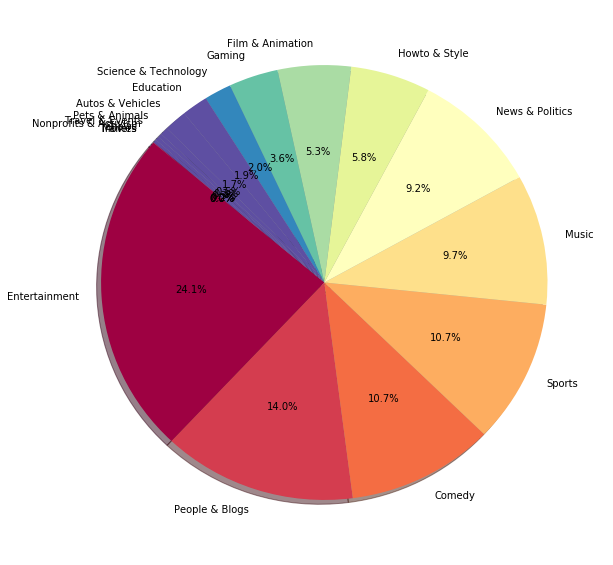

In [7]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1.5, len(us_category_count))]

plt.figure(figsize=(10,10))
plt.pie(fr_category_count, labels=fr_category_count.index,
autopct='%1.1f%%', shadow=True, startangle=140, colors=colors)
plt.show()


In [8]:
df = pd.DataFrame(us_category_count/len(us_df))
df.columns = ['US']
df['CA'] = ca_category_count/len(us_df)
df['DE'] = de_category_count/len(de_df)
df['FR'] = fr_category_count/len(fr_df)
df['GB'] = gb_category_count/len(gb_df)
df['IN'] = in_category_count/len(in_df)
df['JP'] = jp_category_count/len(jp_df)
df['KR'] = kr_category_count/len(kr_df)
df['MX'] = mx_category_count/len(mx_df)
df['RU'] = ru_category_count/len(ru_df)

# trending categories percentage variation among each country
df

,US,CA,DE,FR,GB,IN,JP,KR,MX,RU
Entertainment,0.243327,0.328482,0.374437,0.241111,0.234454,0.447419,0.304975,0.259062,0.333416,0.145880
Music,0.158050,0.091113,0.058080,0.096896,0.353428,0.103288,0.062856,0.052796,0.083335,0.046516
Howto & Style,0.101248,0.049012,0.042728,0.057976,0.049543,0.022623,0.038932,0.016143,0.060987,0.049093
Comedy,0.084422,0.092139,0.062047,0.106645,0.046973,0.091802,0.036203,0.059479,0.043064,0.075235
People & Blogs,0.078390,0.100247,0.146621,0.140433,0.075188,0.070251,0.190762,0.204125,0.201701,0.254056
News & Politics,0.060734,0.101565,0.071866,0.092132,0.031478,0.140314,0.067826,0.219342,0.076957,0.132600
Science & Technology,0.058634,0.028206,0.019736,0.019694,0.013311,0.014778,0.007699,0.003327,0.013127,0.027811
Film & Animation,0.057266,0.050306,0.058178,0.052966,0.066220,0.044389,0.059446,0.063645,0.032088,0.074646
Sports,0.053090,0.068060,0.067385,0.106620,0.049003,0.019571,0.099254,0.027078,0.100121,0.048308
Education,0.040441,0.024201,0.020666,0.018883,0.011743,0.032850,0.005457,0.014060,0.013152,0.017526


In [78]:
# df.to_csv('percentage.csv')

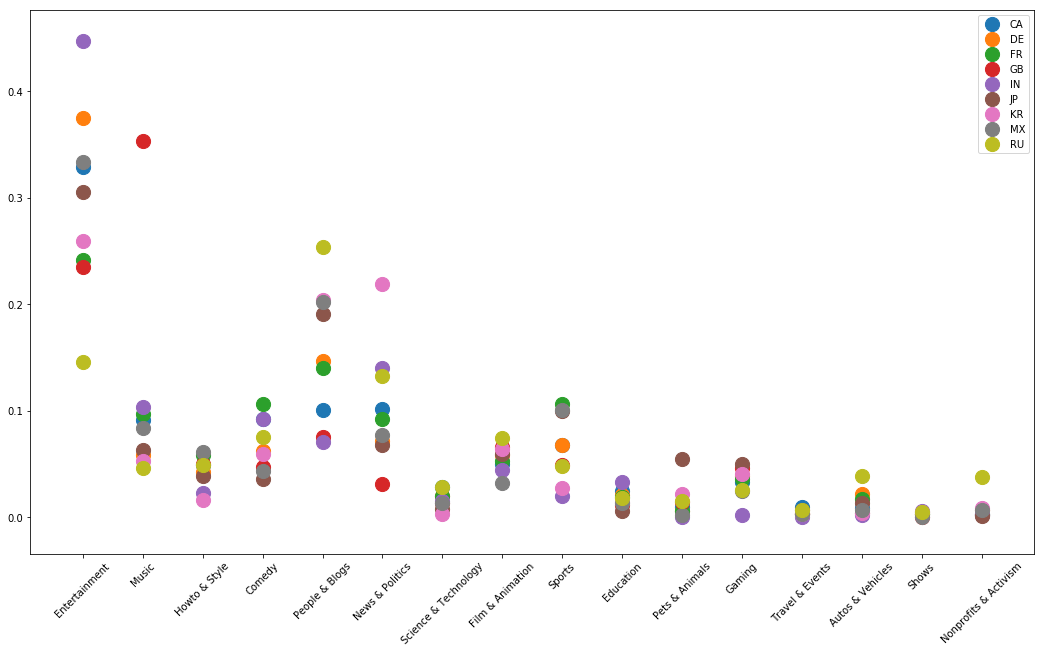

In [9]:
plt.figure(figsize=(18,10))
for col in df.columns[1:]:
    plt.scatter(df.index, df[col], s=200)
    plt.xticks(rotation=45)
plt.legend(numpoints=1)


## US top view videos, tags

In [169]:
def split_tags(df):
    df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
    df['publish_month'] = df['publish_time'].dt.month.map(str) + '-' + df['publish_time'].dt.year.map(str)
    tags = df["tags"].str.replace('"', '')
    tags = tags.str.split("|", expand = True)
    tags['publish_month'] = df['publish_month']
    tags['category'] = df['category']
    return tags
    
def count_tags(df):
    a = df[0].value_counts()
    for i in range(1, len(df.columns)-2):
        b = df[i].value_counts()
        a = a.add(b,fill_value=0)
    return a.sort_values(ascending=False)


In [181]:
# us top 100 views videos
us_top=us_df.sort_values(by='views', ascending=False)[:100]
us_top_tags=split_tags(us_top)
us_top_tags=count_tags(us_top_tags)
us_top_tags

Rap                                              29.0
Childish Gambino                                 22.0
This Is America                                  22.0
mcDJ Recording/RCA Records                       22.0
Pop                                              21.0
Records                                          16.0
FAKE_LOVE                                        12.0
Left                                             12.0
Tears                                            12.0
To                                               12.0
방탄                                               12.0
빅히트                                              12.0
방탄소년단                                            12.0
Universal                                        12.0
BTS                                              12.0
BIGHIT                                           12.0
BANGTAN                                          12.0
Ariana                                           12.0
Grande                      

In [200]:
# by category and time
us_news=us_df[us_df.category == "News & Politics"].sort_values(by='views', ascending=False)[:100]

us_news_1=us_news[us_news.publish_month == '12-2017']
us_news_1=split_tags(us_news_1)
us_news_1=count_tags(us_news_1)
us_news_1

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


year in review     1.0
year               1.0
women's march      1.0
vox.com            1.0
vox                1.0
obama              1.0
hassan minaj       1.0
explain            1.0
donald trump       1.0
charlottesville    1.0
cassini            1.0
2017               1.0
dtype: float64

In [201]:
us_news_2=us_news[us_news.publish_month == '1-2018']
us_news_2=split_tags(us_news_2)
us_news_2=count_tags(us_news_2)
us_news_2

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


michigan                  8.0
meteor                    8.0
super moon                6.0
lunar eclipse             6.0
state of the union        1.0
president donald trump    1.0
politics                  1.0
political news            1.0
must see moments          1.0
latest News               1.0
jake tapper               1.0
Happening Now             1.0
CNN                       1.0
dtype: float64

In [202]:
us_news_3=us_news[us_news.publish_month == '2-2018']
us_news_3=split_tags(us_news_3)
us_news_3=count_tags(us_news_3)
us_news_3

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


olympics                                7.0
Attack                                  6.0
USA gymnastics doctor                   6.0
auth-jbissell-auth                      6.0
USA gymnastics                          6.0
Randy Margraves                         6.0
Rachael Denhollander                    6.0
Olympic medalist                        6.0
Nassar                                  6.0
hero                                    6.0
MSU president                           6.0
MSU doctor                              6.0
MSU                                     6.0
olympian                                6.0
MLive                                   6.0
Lou Anna Simon                          6.0
Larry Nassar                            6.0
sentencing                              6.0
sexual abuse                            6.0
sexual assault                          6.0
Lansing                                 6.0
John Geddert Eaton County               6.0
tackled                         

In [203]:
us_news_4=us_news[us_news.publish_month == '3-2018']
us_news_4=split_tags(us_news_4)
us_news_4=count_tags(us_news_4)
us_news_4

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


latest News        10.0
World News         10.0
US News            10.0
Stephen Hawking    10.0
Matthew Chance     10.0
Happening Now      10.0
CNN                10.0
dtype: float64

# GB top view videos

In [204]:
# gb top 100 views videos
gb_top=gb_df.sort_values(by='views', ascending=False)[:100]
gb_top_tags=split_tags(gb_top)
gb_top_tags=count_tags(gb_top_tags)
gb_top_tags

Bad Bunny                               54.0
Ozuna                                   45.0
Amorfoda                                42.0
El Farsante Remix                       33.0
Romeo Santos                            33.0
Échame La Culpa                         22.0
Reik                                    22.0
Ed Sheeran                              22.0
Shape of You                            22.0
God’s Plan                              22.0
Havana                                  22.0
Maluma                                  22.0
Luis Fonsi                              22.0
Dura                                    22.0
Manuel Turizo                           22.0
Me Niego                                22.0
Piso 21                                 22.0
Perfect                                 22.0
Déjala Que Vuelva                       22.0
Drake                                   22.0
Nego do Borel                           22.0
Yandel                                  22.0
Sobredosis

# RU top view videos

In [205]:
# ru top 100 views videos
ru_top=ru_df.sort_values(by='views', ascending=False)[:100]
ru_top_tags=split_tags(ru_top)
ru_top_tags=count_tags(ru_top_tags)
ru_top_tags


Pop                                        12.0
[none]                                      9.0
2018                                        8.0
방탄소년단                                       8.0
BIGHIT                                      7.0
방탄                                          7.0
BTS                                         7.0
빅히트                                         7.0
BANGTAN                                     7.0
Records                                     5.0
Rap                                         5.0
музыка                                      5.0
superhero                                   4.0
marvel studios                              4.0
тимати                                      4.0
You                                         4.0
avengers: infinity war                      4.0
geeky                                       4.0
comics                                      4.0
lil pump                                    4.0
super hero                              